In [1]:
import matplotlib.pyplot as plt


In [2]:
x = [i for i in range(10)]
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
y = [2*i for i in range(10)]
y

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

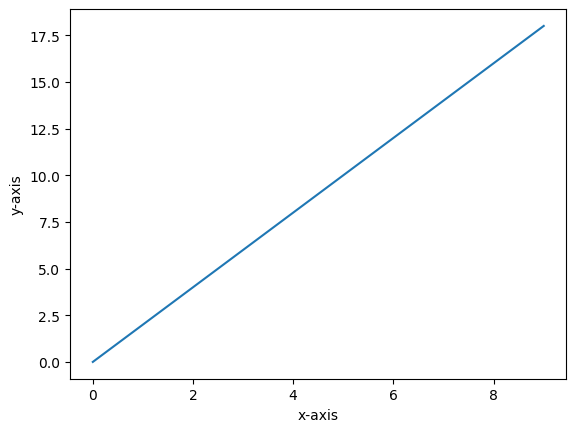

In [6]:
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x, y)

Text(0, 0.5, 'y-axis')

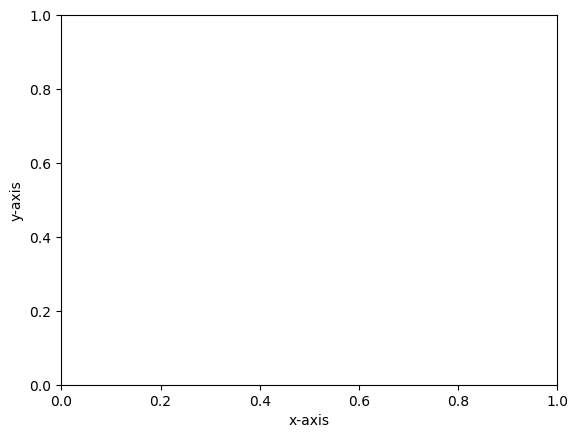

In [8]:
plt.xlabel('x-axis')
plt.ylabel('y-axis')

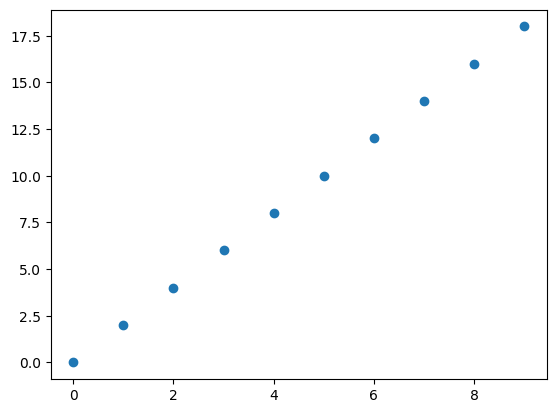

In [9]:
plt.scatter(x, y)

In [60]:
from sklearn import datasets
import numpy as np


iris = datasets.load_iris()
# split it in features and labels

X = iris.data
y = iris.target



print(X, y)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
X.shape

(150, 4)

In [4]:
y.shape

(150,)

In [5]:
from sklearn.model_selection import train_test_split

# Classification: 有紅點 綠點 藍點, 把他們classified, 之後有新的點進來就可以
# 判斷是哪種顏色的點. 讀書10hrs get good grades; 讀書1hr get bad grades.

# hours of study vs good/bad grades
# 10 different students
# train with 8 students
# predict with the remaining 2
# level of accuracy

# test_size: what percent of data will be test purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [1]:
# KNN : K Nearest Neignbours (Classification and Regression Algorithm)
# 判斷點的最近距離的點, 主要是那個顏色, 如果主要是blue, 則為blue
# uniform vs distance. distance: 即便周圍最多的點是blue, 但最近的為red, 則判斷為red
# k use odd number

import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
data = pd.read_csv('car.data')
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
X = data[['buying',
         'maint',
         'safety'
         ]].values

y = data[['class']]


print(X, y)

[['vhigh' 'vhigh' 'low']
 ['vhigh' 'vhigh' 'med']
 ['vhigh' 'vhigh' 'high']
 ...
 ['low' 'low' 'low']
 ['low' 'low' 'med']
 ['low' 'low' 'high']]       class
0     unacc
1     unacc
2     unacc
3     unacc
4     unacc
...     ...
1723   good
1724  vgood
1725  unacc
1726   good
1727  vgood

[1728 rows x 1 columns]


In [9]:
# converting the data
Le = LabelEncoder()
for i in range(len(X[0])):
    X[:, i] = Le.fit_transform(X[:, i])
    
X

array([[3, 3, 1],
       [3, 3, 2],
       [3, 3, 0],
       ...,
       [1, 1, 1],
       [1, 1, 2],
       [1, 1, 0]], dtype=object)

In [10]:
label_mapping = {
    'unacc':0,
    'acc':1,
    'good':2,
    'vgood':3
}
y['class'] = y['class'].map(label_mapping)

y = np.array(y)
y

<ipython-input-10-cf340e8425c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map(label_mapping)


array([[0],
       [0],
       [0],
       ...,
       [0],
       [2],
       [3]], dtype=int64)

In [16]:
# create model
knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction)

print('predictions: ', prediction)
print('accuracy: ', accuracy)

/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


predictions:  [2 0 1 0 0 0 0 0 2 1 0 0 1 2 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 2 2 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 2 2 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 2
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 1 0 0
 3 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 3 0 0 1 2 2 1 0 1 1 3 0 0 0 0 0
 0 0 0 0 0 0 1 2 1 0 0 0 0 0 0 0 1 0 0 1 2 0 0 2 0 0 0 0 0 2 0 1 0 0 0 0 0
 0 1 0 0 3 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 3 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 0 2 2 0 0 0 0 0 1 0 0 0 3 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 2 0
 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 2 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 2 3 1 0 0 0
 0 1 0 0 0 3 0 1 0 0 1 1 0]
accuracy:  0.7456647398843931


In [59]:
a = 269

print('actual value: ', y[a])
print('predicted value: ', knn.predict(X)[a])

actual value:  [1]
predicted value:  1


In [70]:
# SVM : Support Vector Machine(used in Classification & Regression)
from sklearn import svm
from sklearn.metrics import accuracy_score


iris = datasets.load_iris()
# split it in features and labels

classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = svm.SVC()
model.fit(X_train, y_train)

print(model)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

prediction = model.predict(X_test)
acc = accuracy_score(y_test, prediction)

print('prediction: ',prediction)
print('actual: ', y_test)
print('accuracy: ',acc)

for i in range(len(prediction)):
    print(classes[prediction[i]])


SVC()
(120, 4)
(30, 4)
(120,)
(30,)
prediction:  [0 2 2 2 1 2 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 2 0 0 2 1 1 0 2 2]
actual:  [0 2 2 2 1 2 0 1 0 1 0 0 2 1 2 1 1 0 1 1 0 2 0 0 2 1 1 0 2 2]
accuracy:  0.9333333333333333
Iris Setosa
Iris Virginica
Iris Virginica
Iris Virginica
Iris Versicolour
Iris Virginica
Iris Setosa
Iris Versicolour
Iris Setosa
Iris Versicolour
Iris Setosa
Iris Setosa
Iris Versicolour
Iris Versicolour
Iris Versicolour
Iris Versicolour
Iris Versicolour
Iris Setosa
Iris Versicolour
Iris Versicolour
Iris Setosa
Iris Virginica
Iris Setosa
Iris Setosa
Iris Virginica
Iris Versicolour
Iris Versicolour
Iris Setosa
Iris Virginica
Iris Virginica


X
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)
y
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5

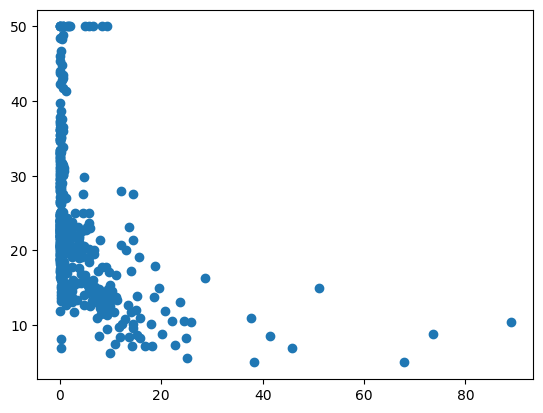

In [11]:
# Linear Regression

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

    
raw_df = pd.read_csv('boston.csv', sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# features / labels
X = data
y = target

print('X')
print(X)
print(X.shape)
print('y')
print(y)
print(y.shape)

# algorithm
l_reg = linear_model.LinearRegression()

plt.scatter(X.T[0], y) # 第一個feature
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#train

model = l_reg.fit(X_train, y_train)
prediction = model.predict(X_test)
print('Prediction: ', prediction)
print('R^2 value: ', l_reg.score(X, y))
print('coedd: ', l_reg.coef_)
print('intercept: ', l_reg.intercept_)

Prediction:  [11.3240735  22.84297836 22.16995532 32.1216462  32.72009658 14.86157476
 25.29606169 27.73287546 22.49052064 26.81135197 30.80922665 15.92154694
 22.5151104  16.89763253 25.58141213 25.306881   17.67442766 21.11691519
 11.49070987 23.78333807 24.1552128  11.86482019 11.95185565 31.08242701
 14.87858857 25.83894616 20.01798867 13.13341886 14.07652676 19.39265838
 24.77295748 25.23742469 31.27111372 17.42862678 13.76317836 28.53488147
  4.70016452 26.85416039 22.00288887 24.83151181 25.07341463 32.99020806
  9.56523194 25.26117404 12.11700122  0.26517982 19.73120432 28.88852964
 18.15749111 22.3082108  18.24522489 16.32038246 13.03014978 28.92857581
 45.39505036 24.72611104  8.68687399 21.39712926 24.12596506 41.03037326
 28.89018191 11.45351436 24.4762124  39.92192979 19.34214288 30.5230342
 24.74394975 19.56352751 31.98519255 33.38214471 14.74592774 22.67521742
 22.15153235 25.48113628 33.5319841  22.70851822 16.94044591 12.26415186
 25.81494543 23.84029943 37.04520637 19

### Linear Regression vs Logistic Regression

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import pandas as pd

In [9]:
bc = load_breast_cancer()
bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [11]:
x = scale(bc.data)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [12]:
y = bc.target

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# random_state = 0 : numbers be the same
model = KMeans(n_clusters = 2, random_state = 0)

In [14]:
model.fit(x_train)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [15]:
predictions = model.predict(x_test)

In [16]:
labels = model.labels_

In [17]:
print('labels', labels)
print('predictions', predictions)
print('accuracy', accuracy_score(y_test, predictions))
print('actual', y_test)

labels [1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1
 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1
 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1
 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1
 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1
 0 1 0 1 1 1 1 1 0 1 1]
predictions [1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 

In [18]:
print(pd.crosstab(y_train, labels))

col_0    0    1
row_0          
0      142   33
1        6  274


### Neural Networks

In [ ]:
# find patterns

### Overfitting and Underfitting

In [ ]:
# underfitting : too simple
# overfitting : too complicated
# perfect fit : low variance(training and testing data)

### Loss Function vs Gradient Function

### Backpropagation

### CNN

In [ ]:
# convolutional neural network

In [11]:
%pip install mnist
from PIL import Image
import mnist
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# training
x_train = mnist.train_images()
y_train = mnist.train_labels()

In [ ]:
x_test = mnist.test_images()
y_test = mnist.test_labels()

In [ ]:
# x_train.shape change from (60000, 28, 28) to (60000, 784)
x_train = x_train.reshape((-1,28*28))

In [ ]:
x_test = x_test.reshape((-1, 28*28))

In [ ]:
# 將數值轉換成0~1 , 原本數據的最大值為256
x_train = (x_train/256)
x_test = (x_test/256)

In [ ]:
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_size=(64,64))

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
prediction = clf.predict(x_test)

In [ ]:
acc = confusion_matrix(y_test, prediction)

In [ ]:
# download GIMP